<a href="https://colab.research.google.com/github/t0t0-01/Handwritten-Digit-Letter-Recognition-App/blob/main/Testing_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digit/Letter Recognition App
In this project, we will be developing a mobile application using React Native that is able to recognize digits and letters drawn by the user. 

<img src="https://miro.medium.com/max/1400/1*4TJWlK-FPhskEIJshfEx5g.jpeg" />

This notebook intends to detail the research and analysis done by the team. Different machine learning models will be discussed (our in-house KNN model, SciKitLearn KNN, SVM, Decision Tree, Random Forest, and an Ensemble Classifier). Their testing accuracies will be discussed, along with their confusion matrices. 

At the end, we will justify the use of the final model in our application.

*Mount the Drive*

In [ ]:
from google.colab import drive
import sys 

drive.mount('/content/drive/') 

FolderName = '/MyDrive/IEA Project 1'
assert FolderName is not None, '[!] Enter Folder Name'

sys.path.append('/content/drive/{}'.format(FolderName)) 

%cd /content/drive/$FolderName

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/IEA Project 1


*Imports*

In [ ]:
import time
import joblib
import numpy as np
import pandas as pd
from Knn import KNN 
from sklearn import svm
from Testing import test
from sklearn import metrics
from Features import zoning
from Training import getData
from Features import profiles
from Features import per_Pixel
import matplotlib.pyplot as plt
from collections import Counter
from Features import intersections
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from Features import getHistograms
from Features import invariantMoments
from Pre_Processing import get_bounding_box
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 

*Get training and testing values*



```
getData takes 2 parameters:
1.  sp: to resplit the data (True) or to leave the same split (False)
2.   tr: to retrain the data (True) or to just get the pre-trained features (train = get feature vectors)
```



In [ ]:
x_train, y_train, x_test, y_test = getData(sp=0, tr=0)
#fit = False, if we want to use pre-fitted models in our testings
#fit = True if we want to re-fit the models in our testings
fit = 0

###Our own KNN 

Our k-NN's accuracy:  0.6690140845070423
Time elapsed by our k-NN:  34.93830680847168
Our KNN Precision:  0.6819164448551407
Our KNN Recall:  0.6702618277119252
Our KNN F-value:  0.6663363021747675
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


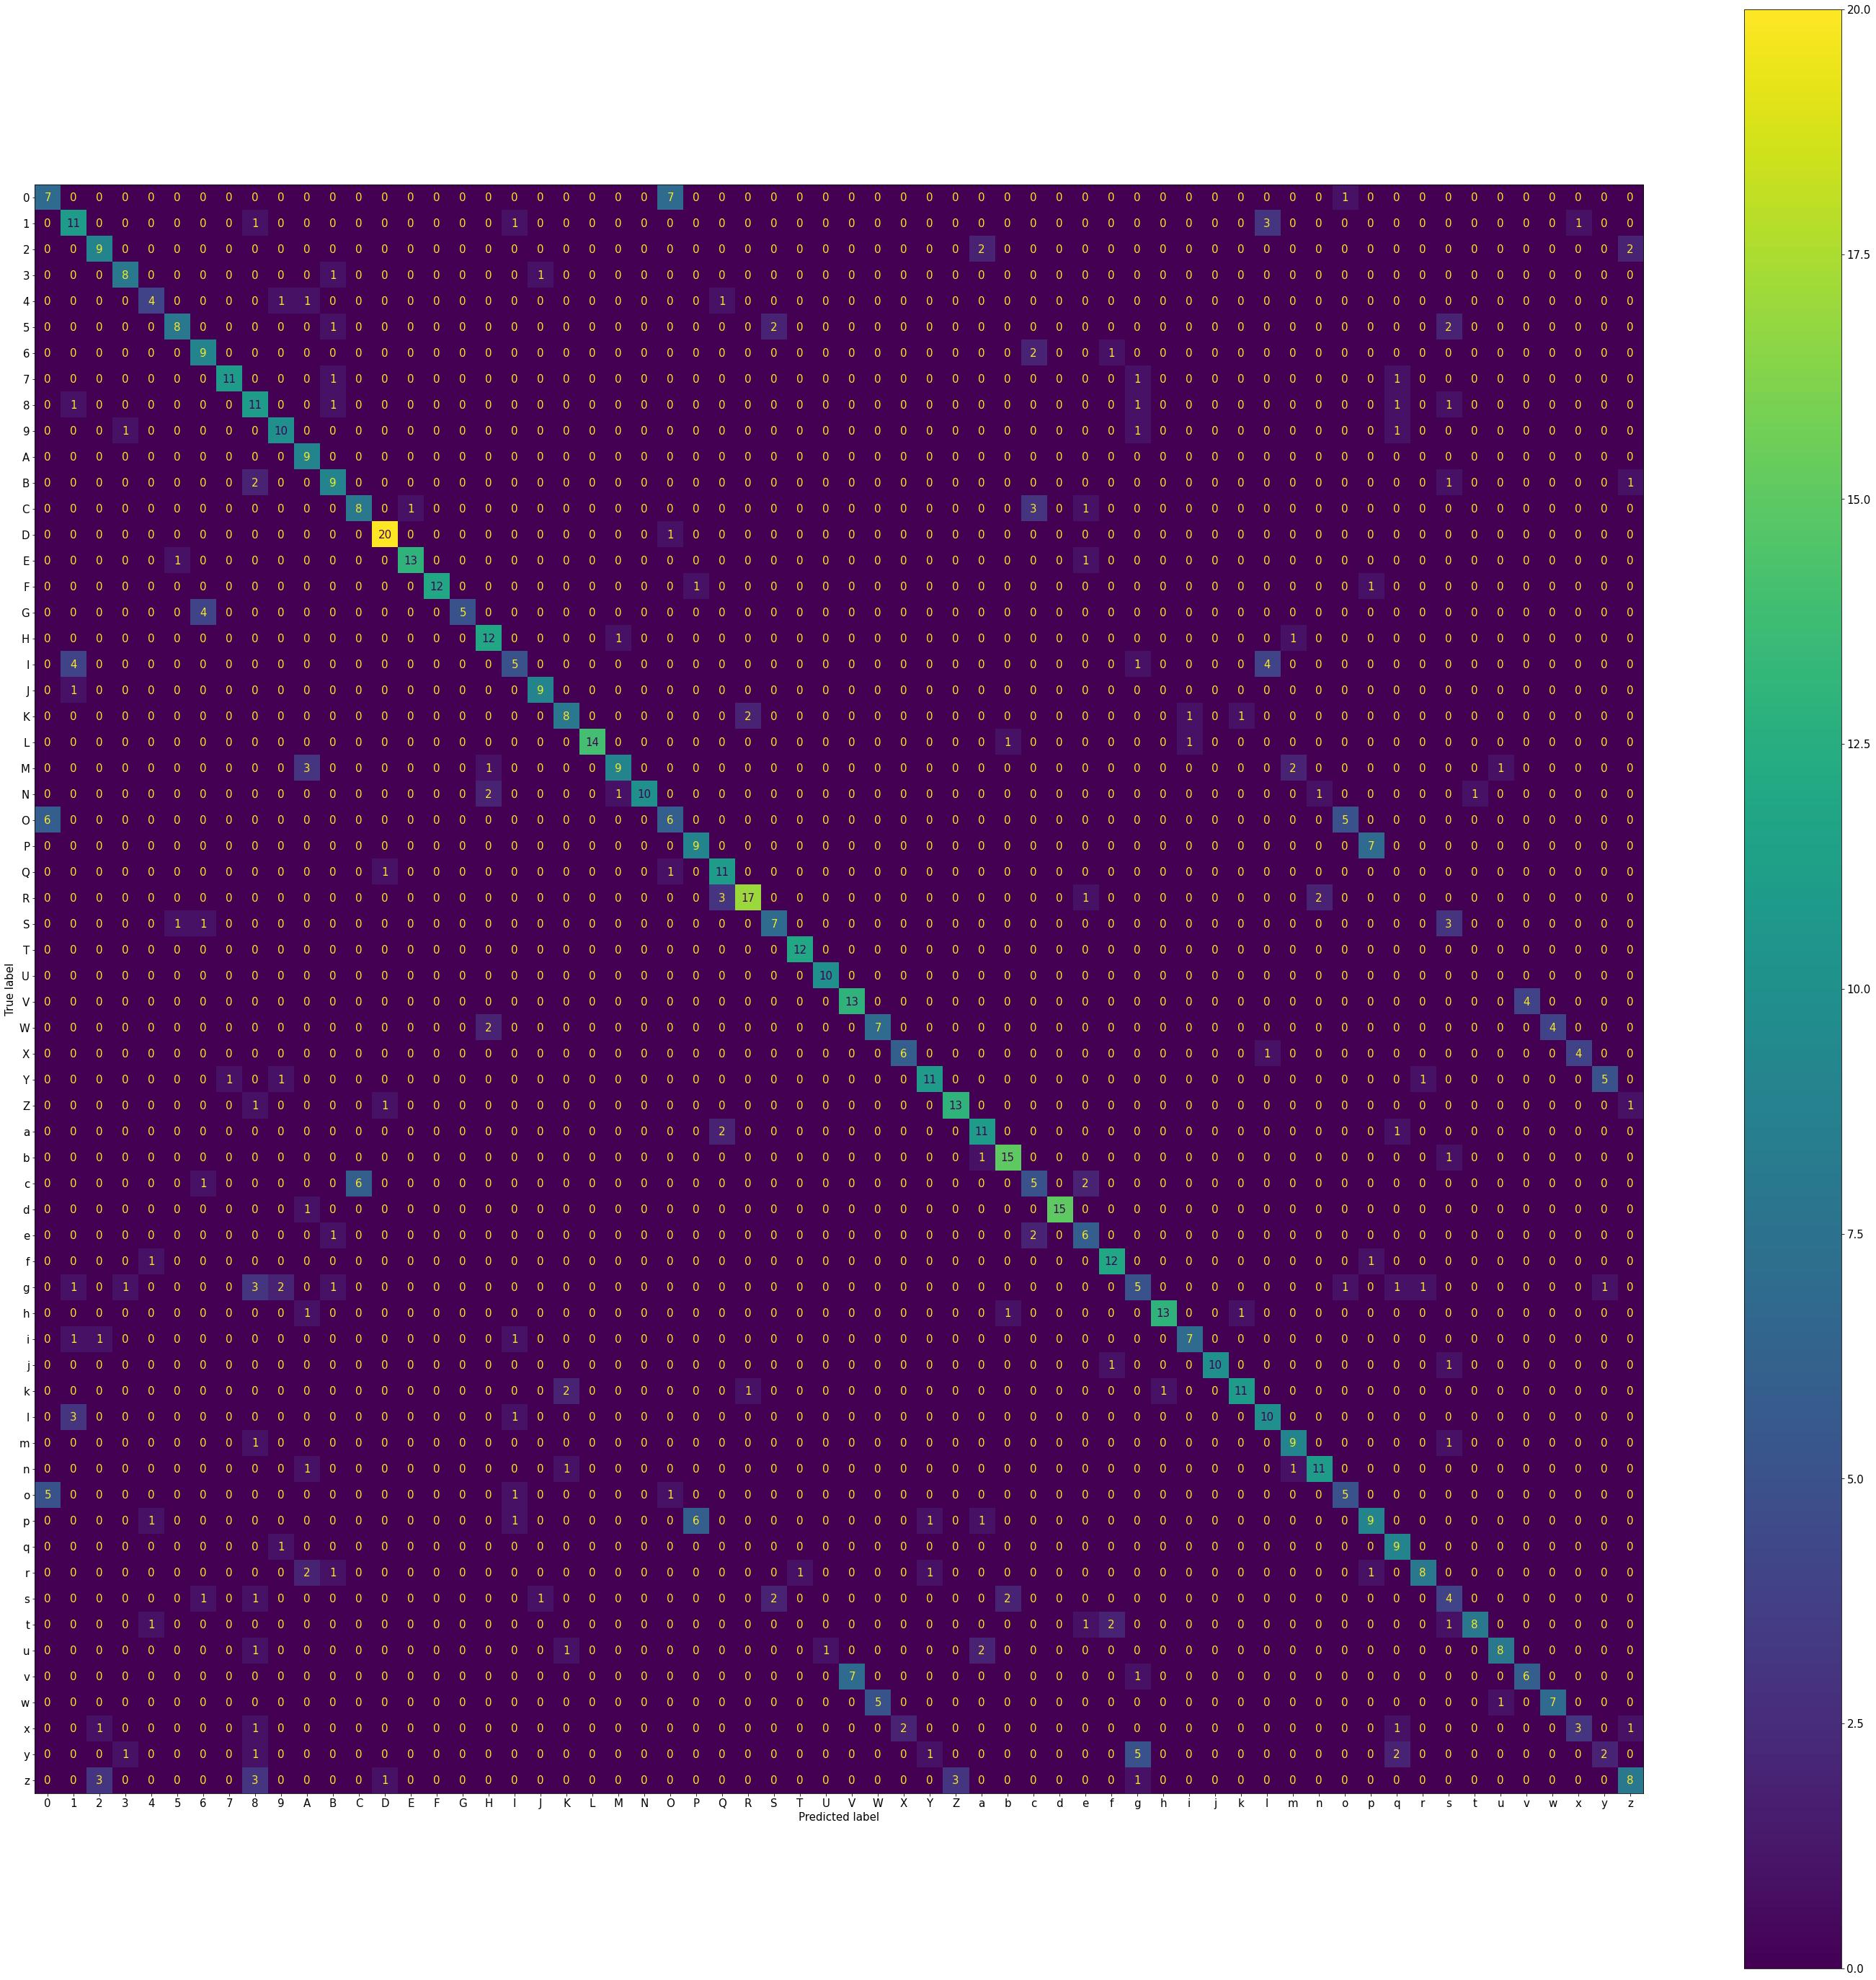

In [ ]:
if fit:
    knn_model = KNN(5)
    knn_model.fit(x_train, y_train) 
    joblib.dump(knn_model, './models/knn_model')
else:
    knn_model = joblib.load('./models/knn_model')
t1 = time.time()
res1 = []
for i in x_test:
    a = knn_model.predict(i)
    b = Counter(a)
    res1.append(b.most_common()[0][0])
print("Our k-NN's accuracy: ", metrics.accuracy_score(y_test, res1))
print("Time elapsed by our k-NN: ", time.time()-t1)

values = metrics.precision_recall_fscore_support(y_test, res1, average = 'macro')
print('Our KNN Precision: ', values[0])
print('Our KNN Recall: ', values[1])
print('Our KNN F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res1)

plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("ourKNN.png")
%cd ..

plt.show()

###Test Scikit Learn's k-NN

Scikit Learn's KNN accuracy:  0.6654929577464789
Time elapsed by scikit Learn's KNN:  0.2684605121612549
SciKit KNN Precision:  0.6804994868087847
SciKit KNN Recall:  0.6675049429882278
SciKit KNN F-value:  0.6594842027357033
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


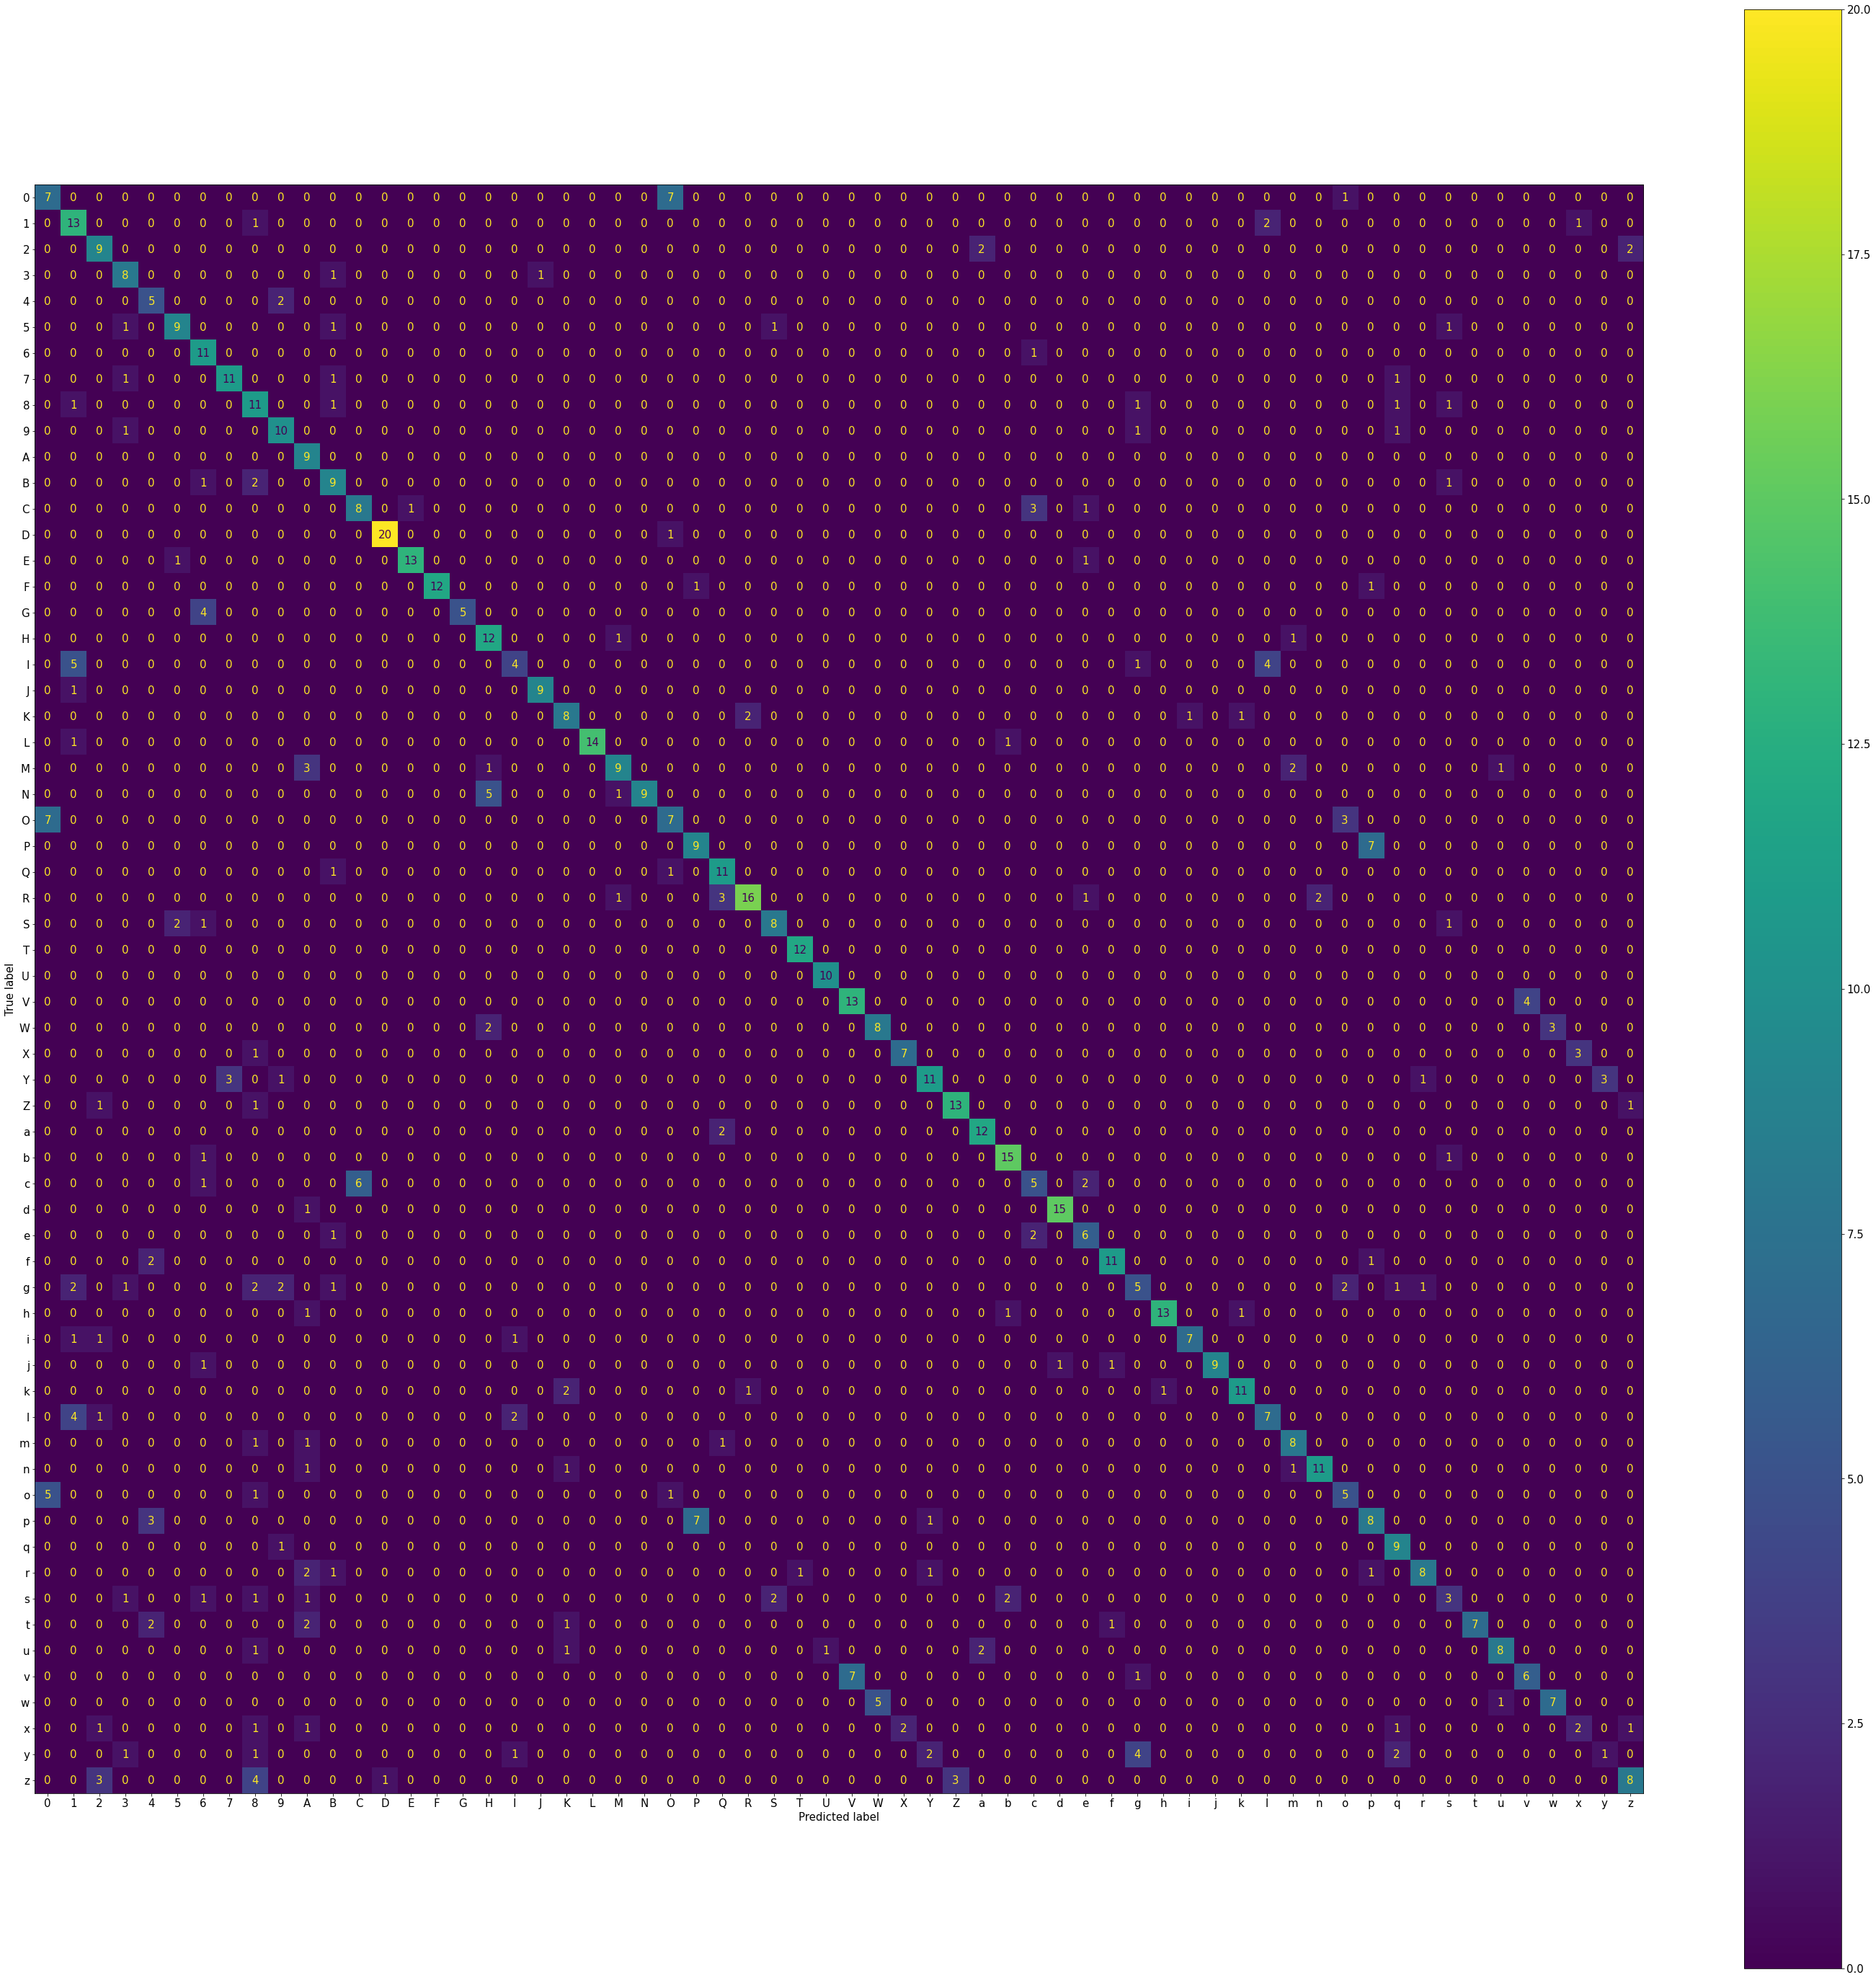

In [ ]:
if fit:
    sl_knn_model = KNeighborsClassifier(n_neighbors=5)
    sl_knn_model = sl_knn_model.fit(x_train, y_train) 
    joblib.dump(sl_knn_model, './models/sl_knn_model')
else:
    sl_knn_model = joblib.load('./models/sl_knn_model')
t2 = time.time()
res2 = sl_knn_model.predict(x_test)

print("Scikit Learn's KNN accuracy: ", metrics.accuracy_score(y_test.reshape(-1,1), res2))
print("Time elapsed by scikit Learn's KNN: ", time.time()-t2)

values = metrics.precision_recall_fscore_support(y_test, res2, average = 'macro')
print('SciKit KNN Precision: ', values[0])
print('SciKit KNN Recall: ', values[1])
print('SciKit KNN F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res2)

plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("scikitKNN.png")
%cd ..
plt.show()

###SVM

SVM's accuracy:  0.7253521126760564
Time Elapsed by SVM:  2.674652338027954
SciKit SVM Precision:  0.7365818927707222
SciKit SVM Recall:  0.7258970517530856
SciKit SVM F-value:  0.7185703676670356
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


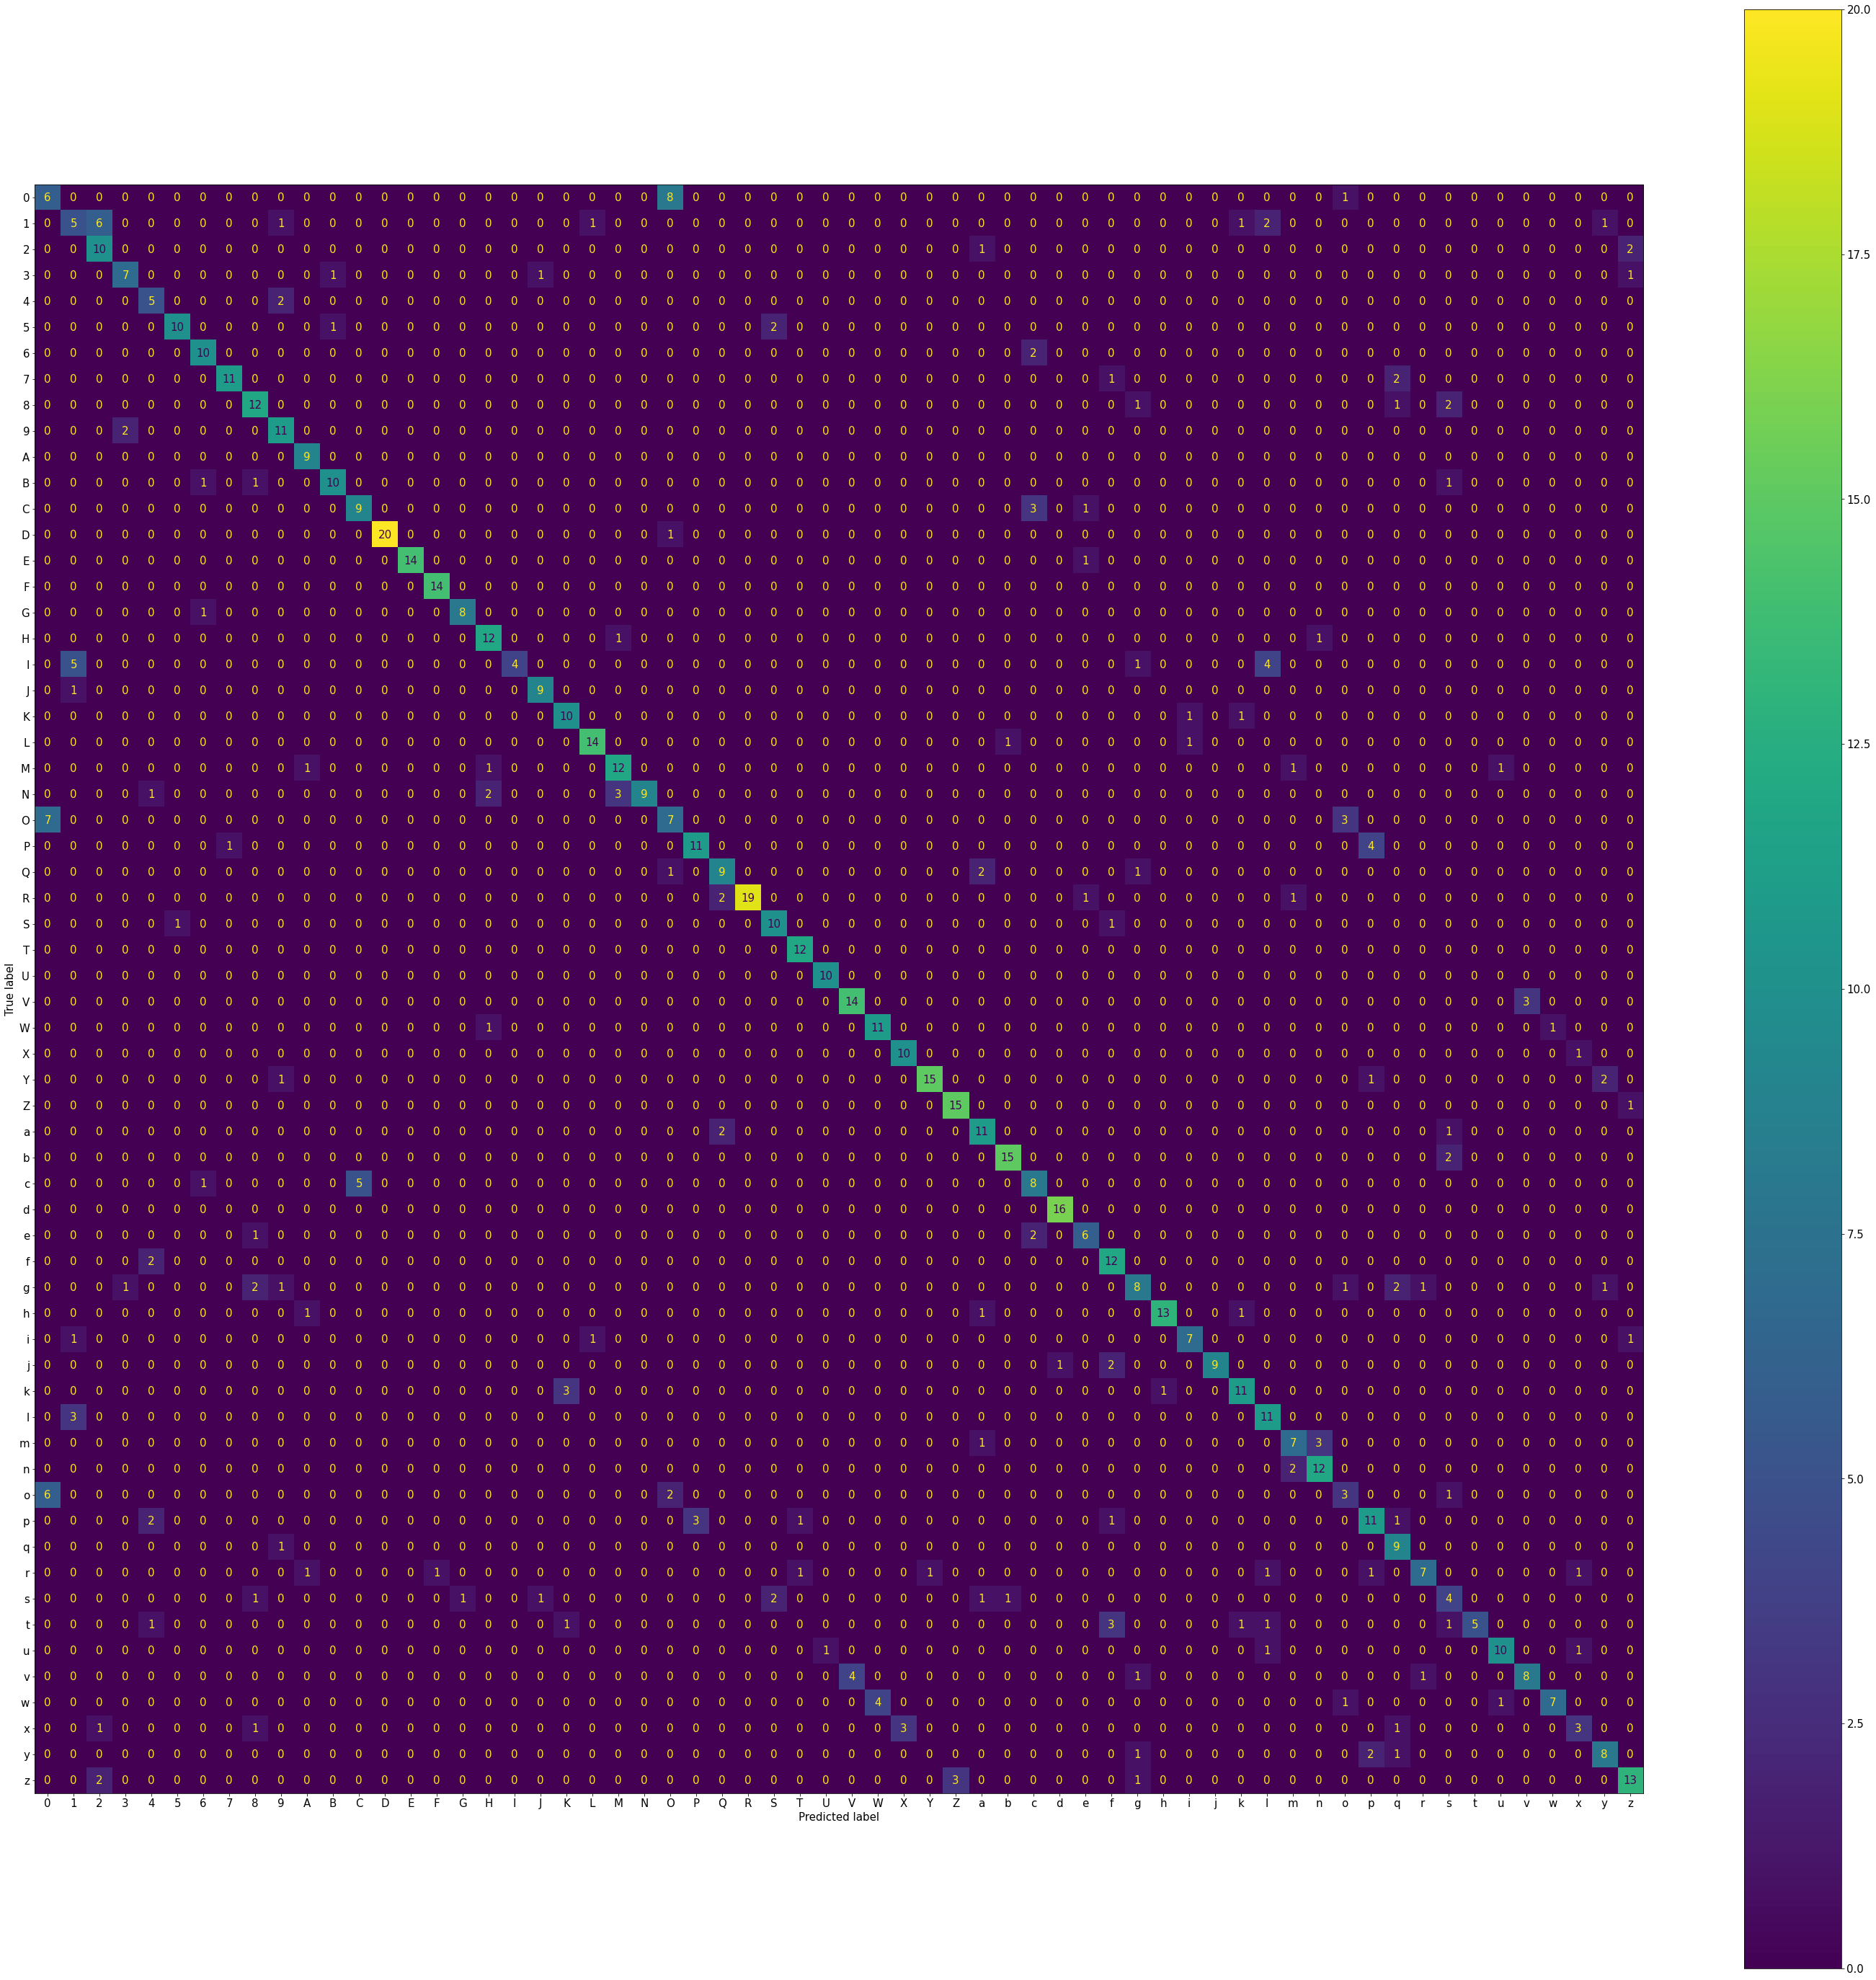

In [ ]:
if fit:
    svm_model = svm.NuSVC()
    svm_model.fit(x_train, y_train)
    joblib.dump(svm_model, './models/svm_model')
else:
    svm_model = joblib.load('./models/svm_model')
t3 = time.time()
res3 = svm_model.predict(x_test)
    
print("SVM's accuracy: ", metrics.accuracy_score(y_test.reshape(-1,1), res3))
print ("Time Elapsed by SVM: ", time.time()-t3)

values = metrics.precision_recall_fscore_support(y_test, res3, average = 'macro')
print('SciKit SVM Precision: ', values[0])
print('SciKit SVM Recall: ', values[1])
print('SciKit SVM F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res3)

plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("SVM.png")
%cd ..

plt.show()

###Decision Tree

Decision Tree's Accuracy:  0.5845070422535211
Time Elapsed by Decision Tree:  0.00813150405883789
SciKit Decision Tree Precision:  0.5956822768623675
SciKit Decision Tree Recall:  0.5785561815368448
SciKit Decision Tree F-value:  0.5788766305211016
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


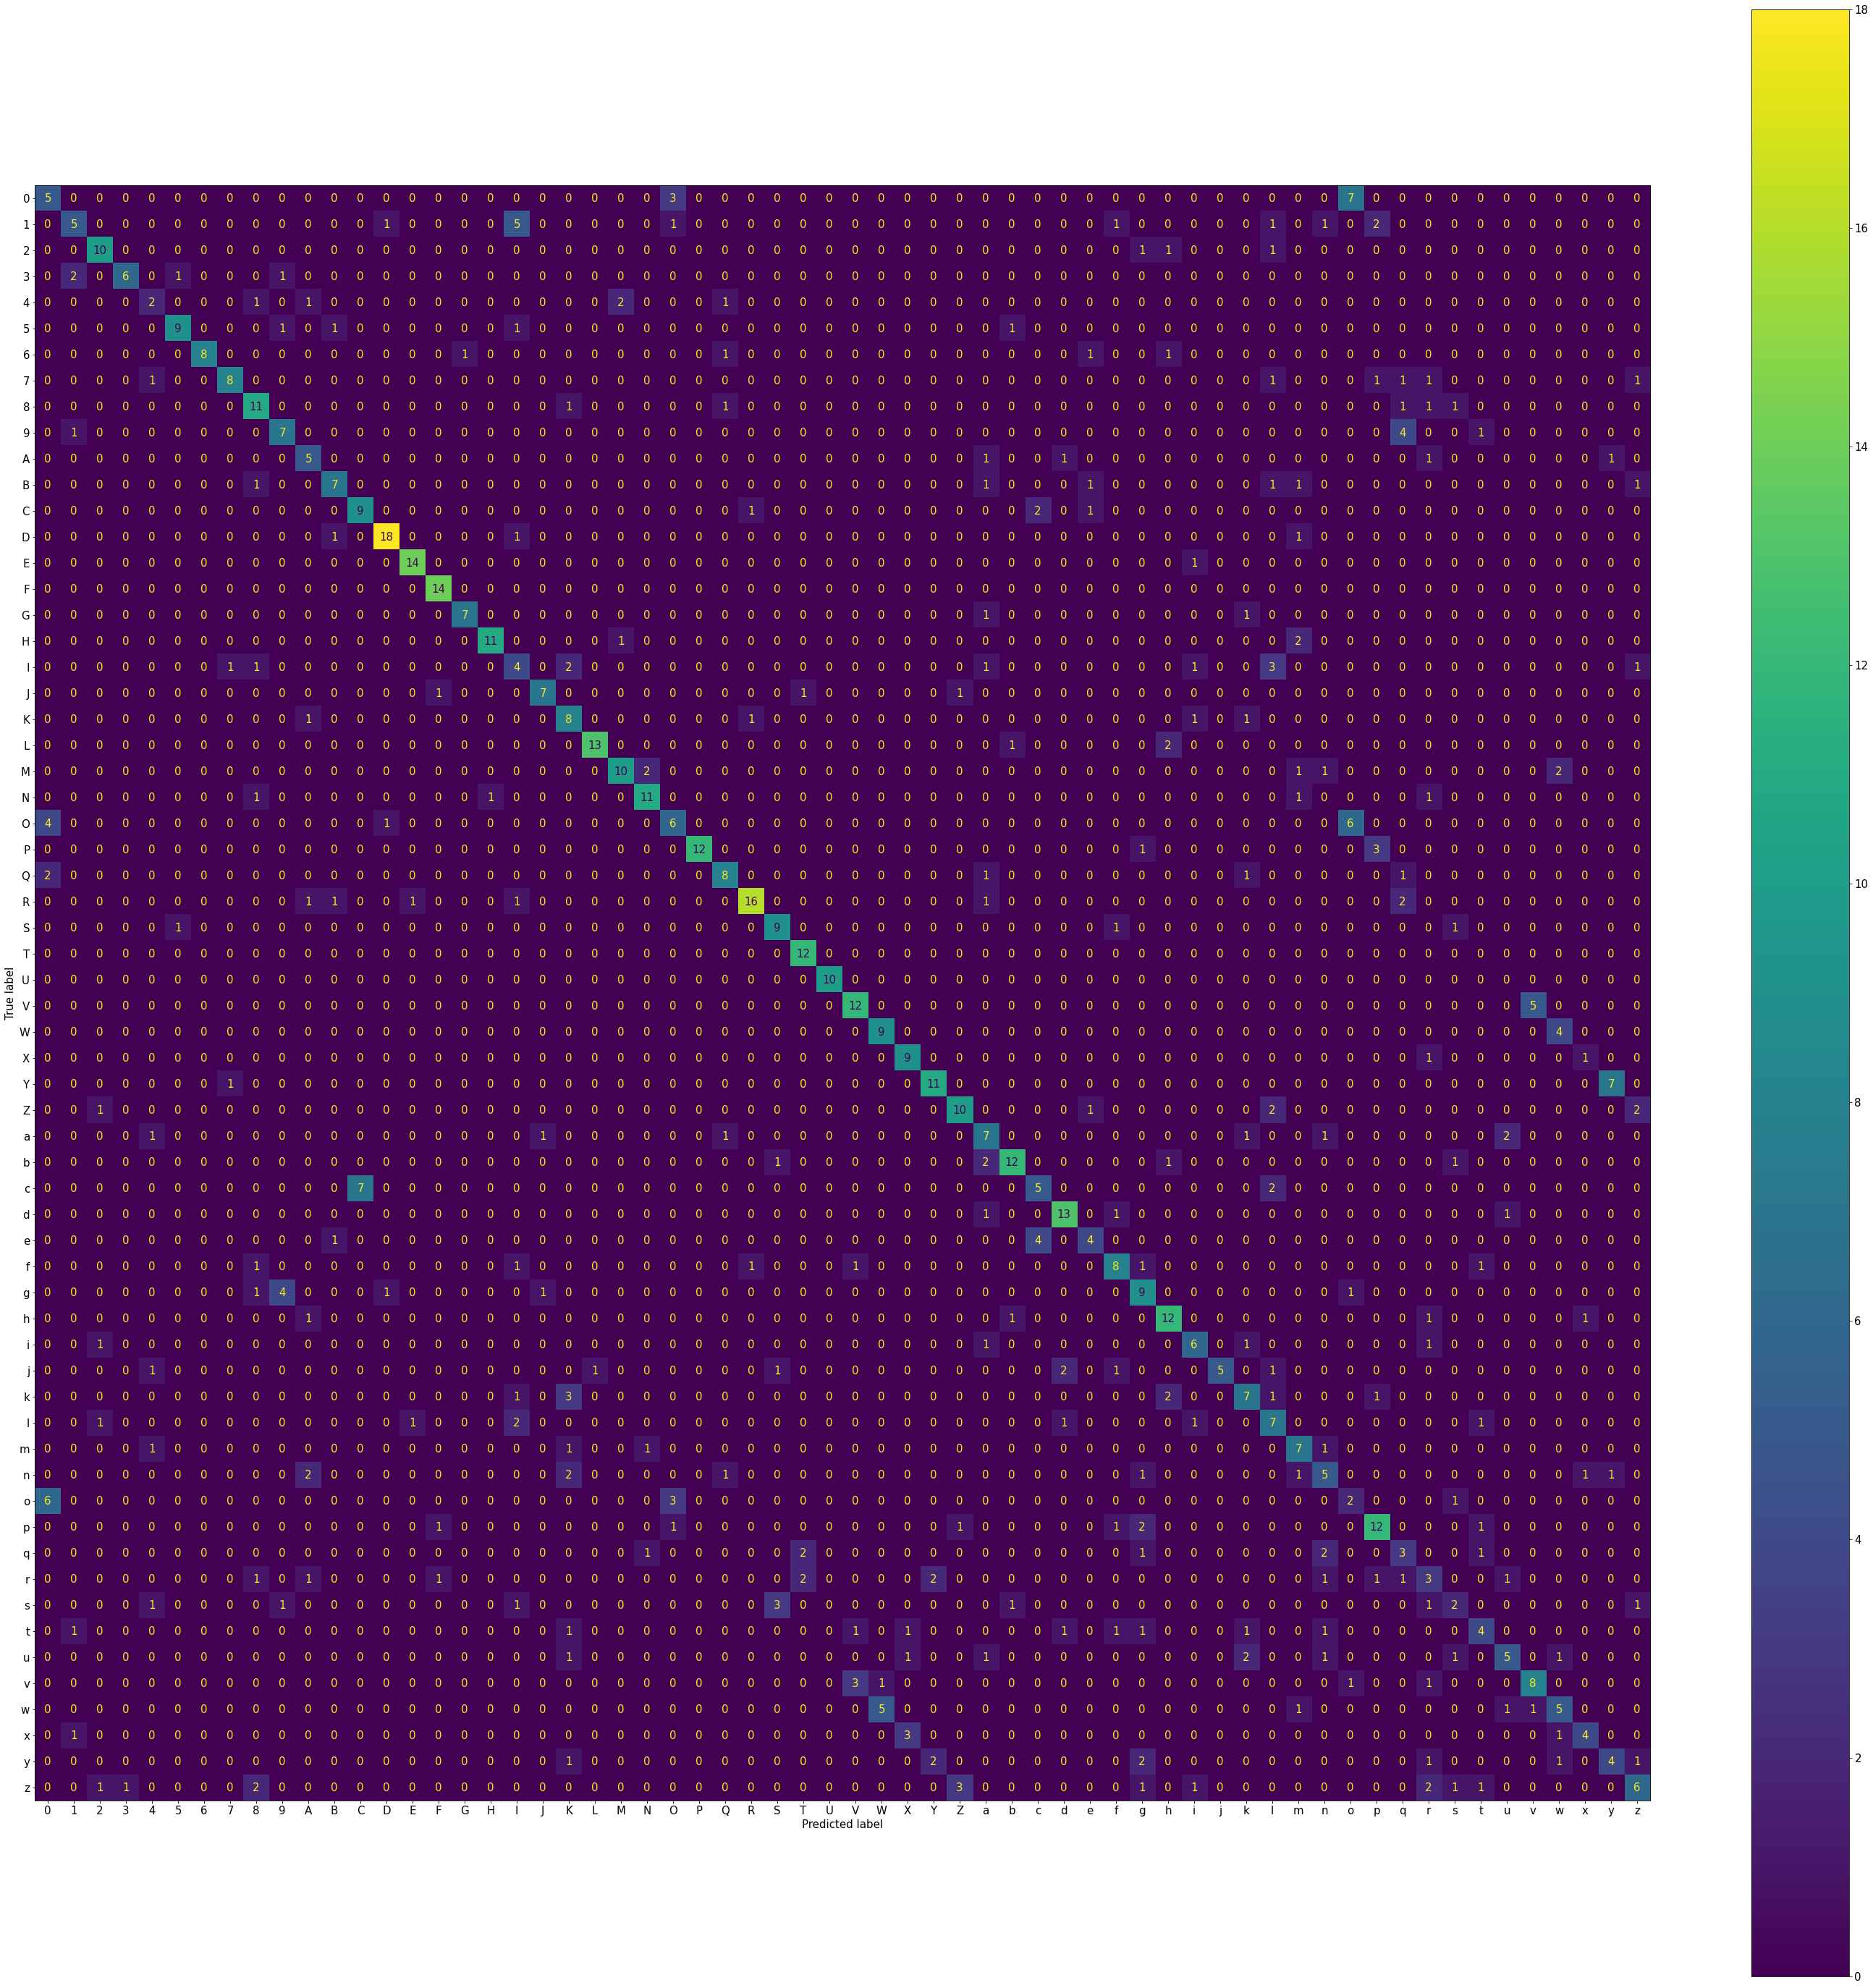

In [ ]:
if fit:
  tree_model = DecisionTreeClassifier()
  tree_model.fit(x_train, y_train) 
  joblib.dump(tree_model, './models/tree_model')
else:
    tree_model = joblib.load('./models/tree_model')
t4 = time.time()
res4 = tree_model.predict(x_test)
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test.reshape(-1,1), res4))
print("Time Elapsed by Decision Tree: ", time.time() - t4)

values = metrics.precision_recall_fscore_support(y_test, res4, average = 'macro')
print('SciKit Decision Tree Precision: ', values[0])
print('SciKit Decision Tree Recall: ', values[1])
print('SciKit Decision Tree F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res4)

plt.rcParams['figure.figsize'] = (50, 50) 
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("DecisionTree.png")
%cd ..

plt.show()

###Random Forest

Random Forest's Accuracy:  0.778169014084507
Time Elapsed by Random Forest:  0.3292548656463623
SciKit Random Forest Precision:  0.7850383984133207
SciKit Random Forest Tree Recall:  0.7824648935194083
SciKit Random Forest Tree F-value:  0.7769188287236619
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


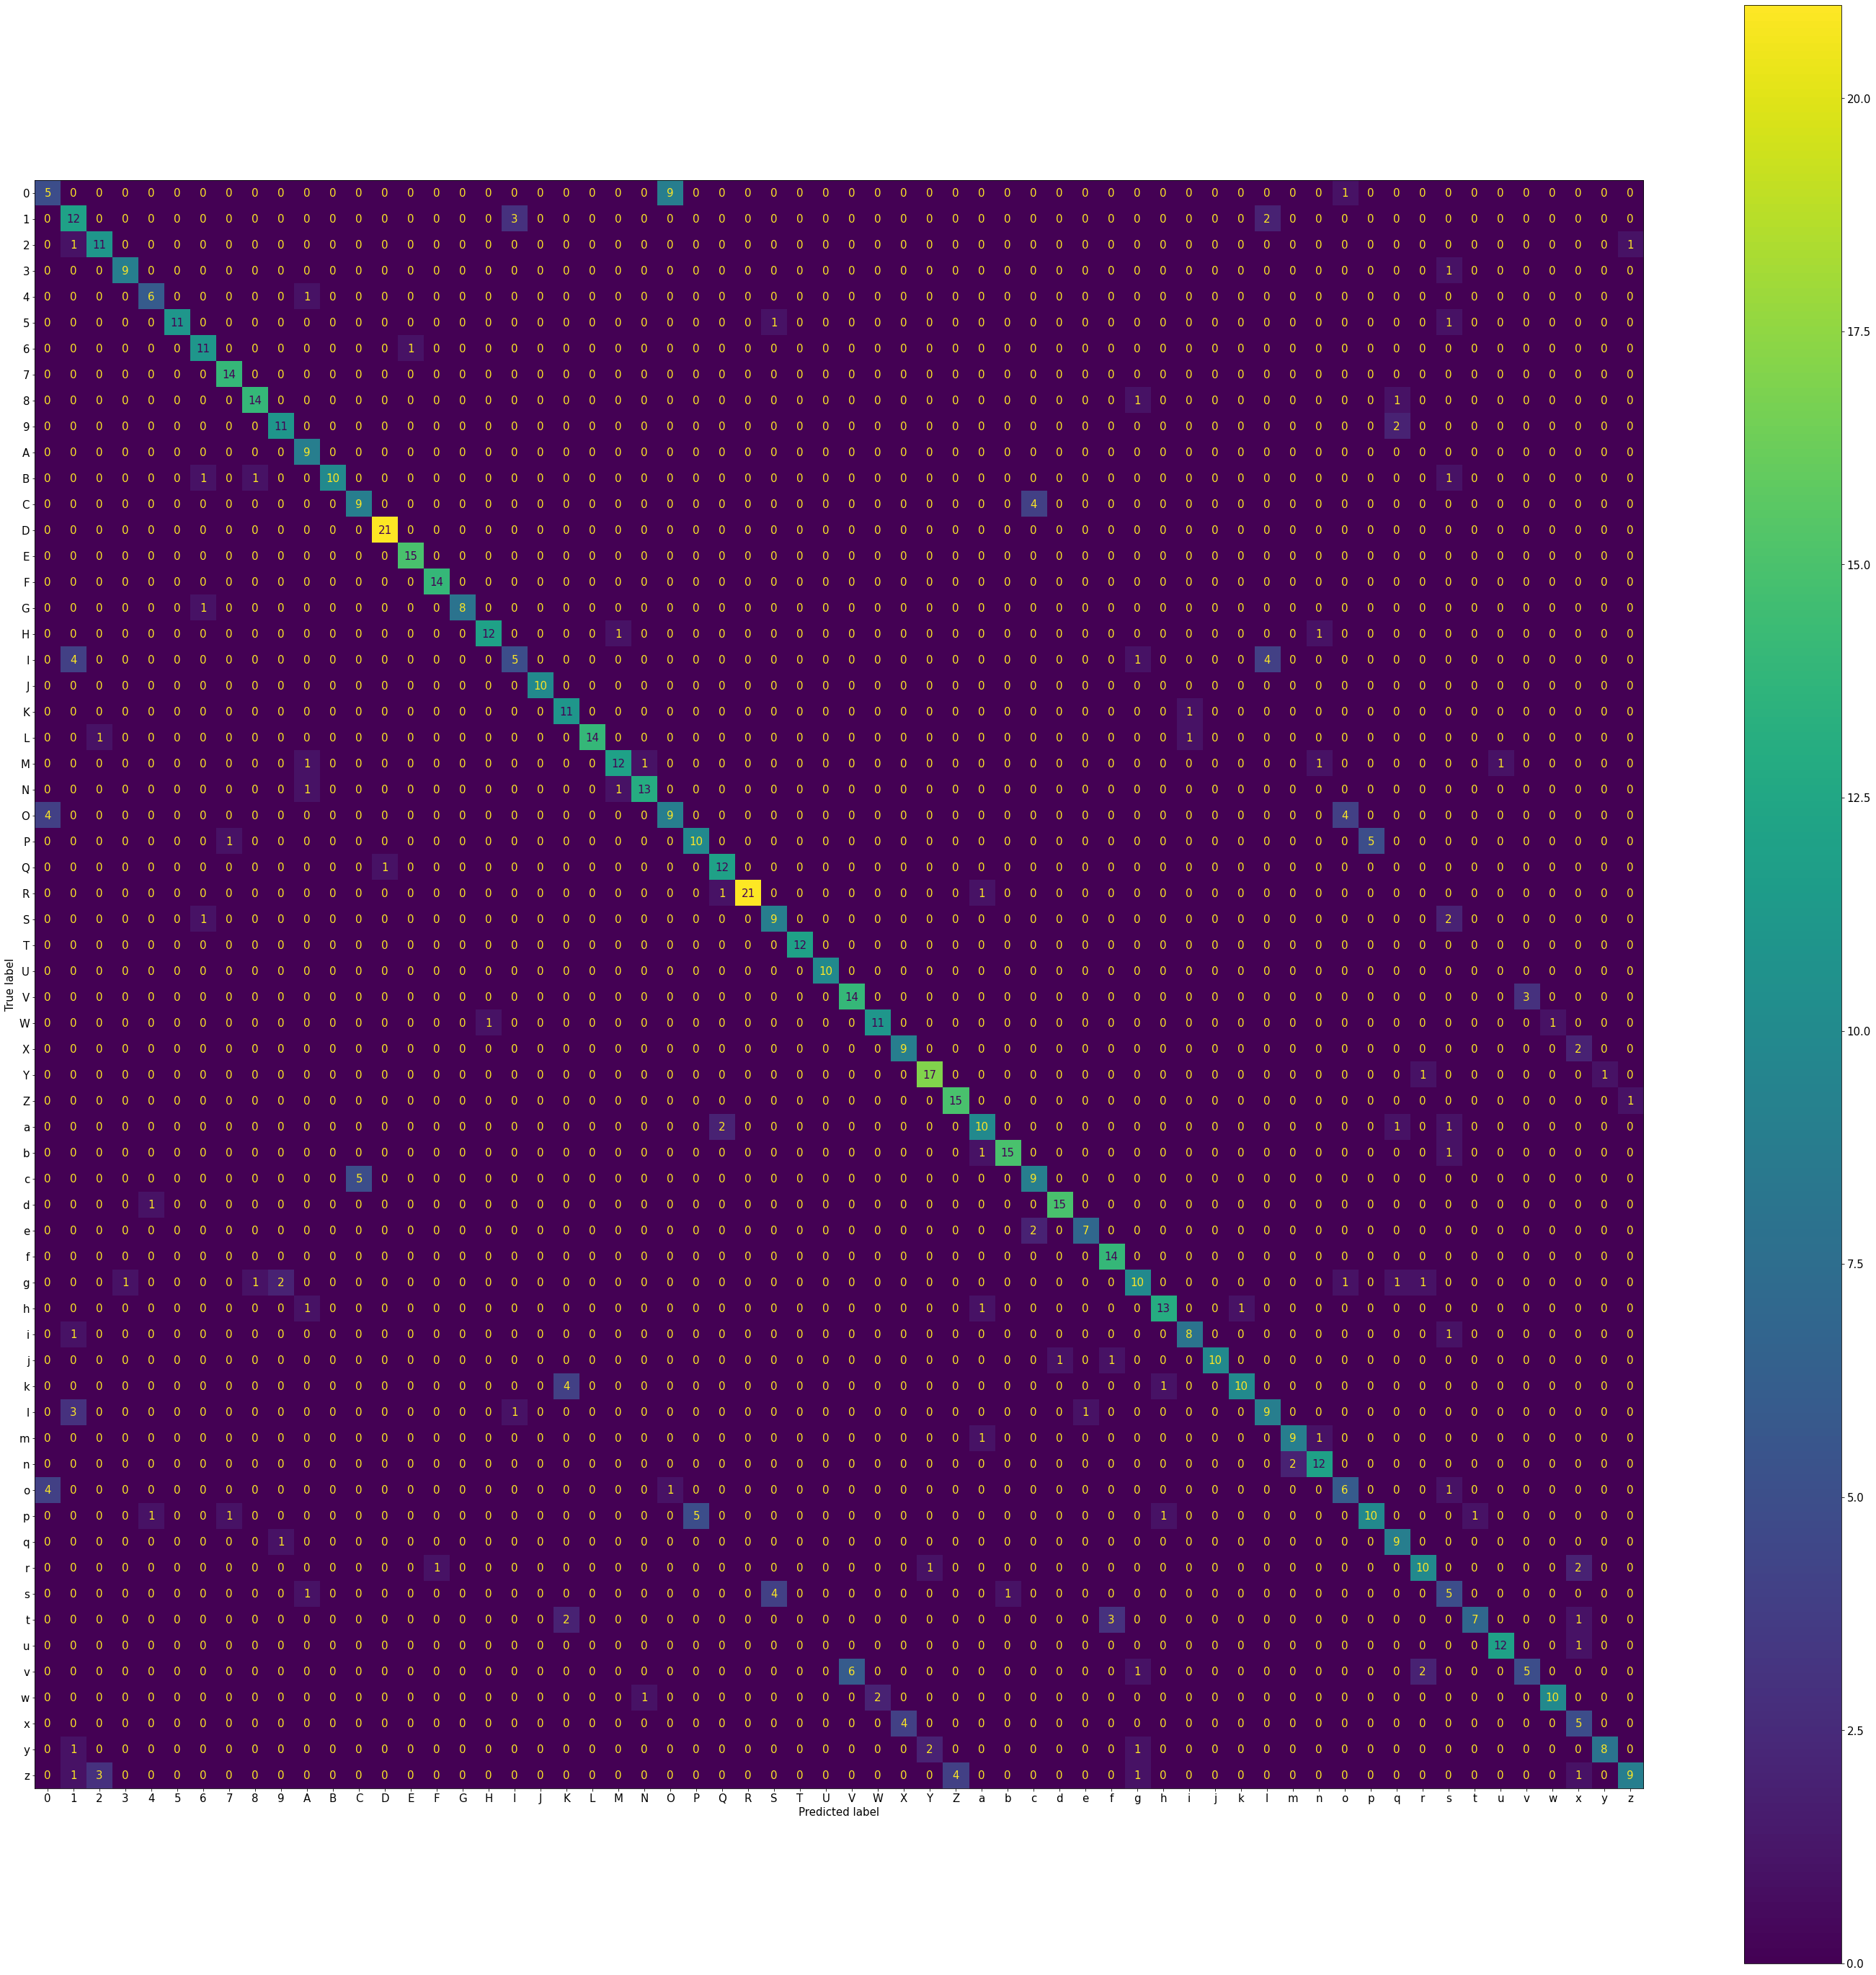

In [ ]:
if fit:
    rf_model = RandomForestClassifier(n_estimators=150)
    rf_model.fit(x_train, y_train) 
    joblib.dump(rf_model, './models/rf_model')
else:
    rf_model = joblib.load('./models/rf_model')
t5 = time.time()
res5 = rf_model.predict(x_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test.reshape(-1,1), res5))
print("Time Elapsed by Random Forest: ", time.time() - t5)

values = metrics.precision_recall_fscore_support(y_test, res5, average = 'macro')
print('SciKit Random Forest Precision: ', values[0])
print('SciKit Random Forest Tree Recall: ', values[1])
print('SciKit Random Forest Tree F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res5)

plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("RandomForest.png")
%cd ..

plt.show()

###Ensemble

Ensemble's Accuracy:  0.7394366197183099
Time Elapsed by Ensemble:  2.9405665397644043
SciKit Ensemble Forest Precision:  0.7475946604892338
SciKit Ensemble Forest Tree Recall:  0.7394665619476084
SciKit Ensemble Forest Tree F-value:  0.731232008466179
/content/drive/MyDrive/IEA Project 1/ConfusionMatrices
/content/drive/MyDrive/IEA Project 1


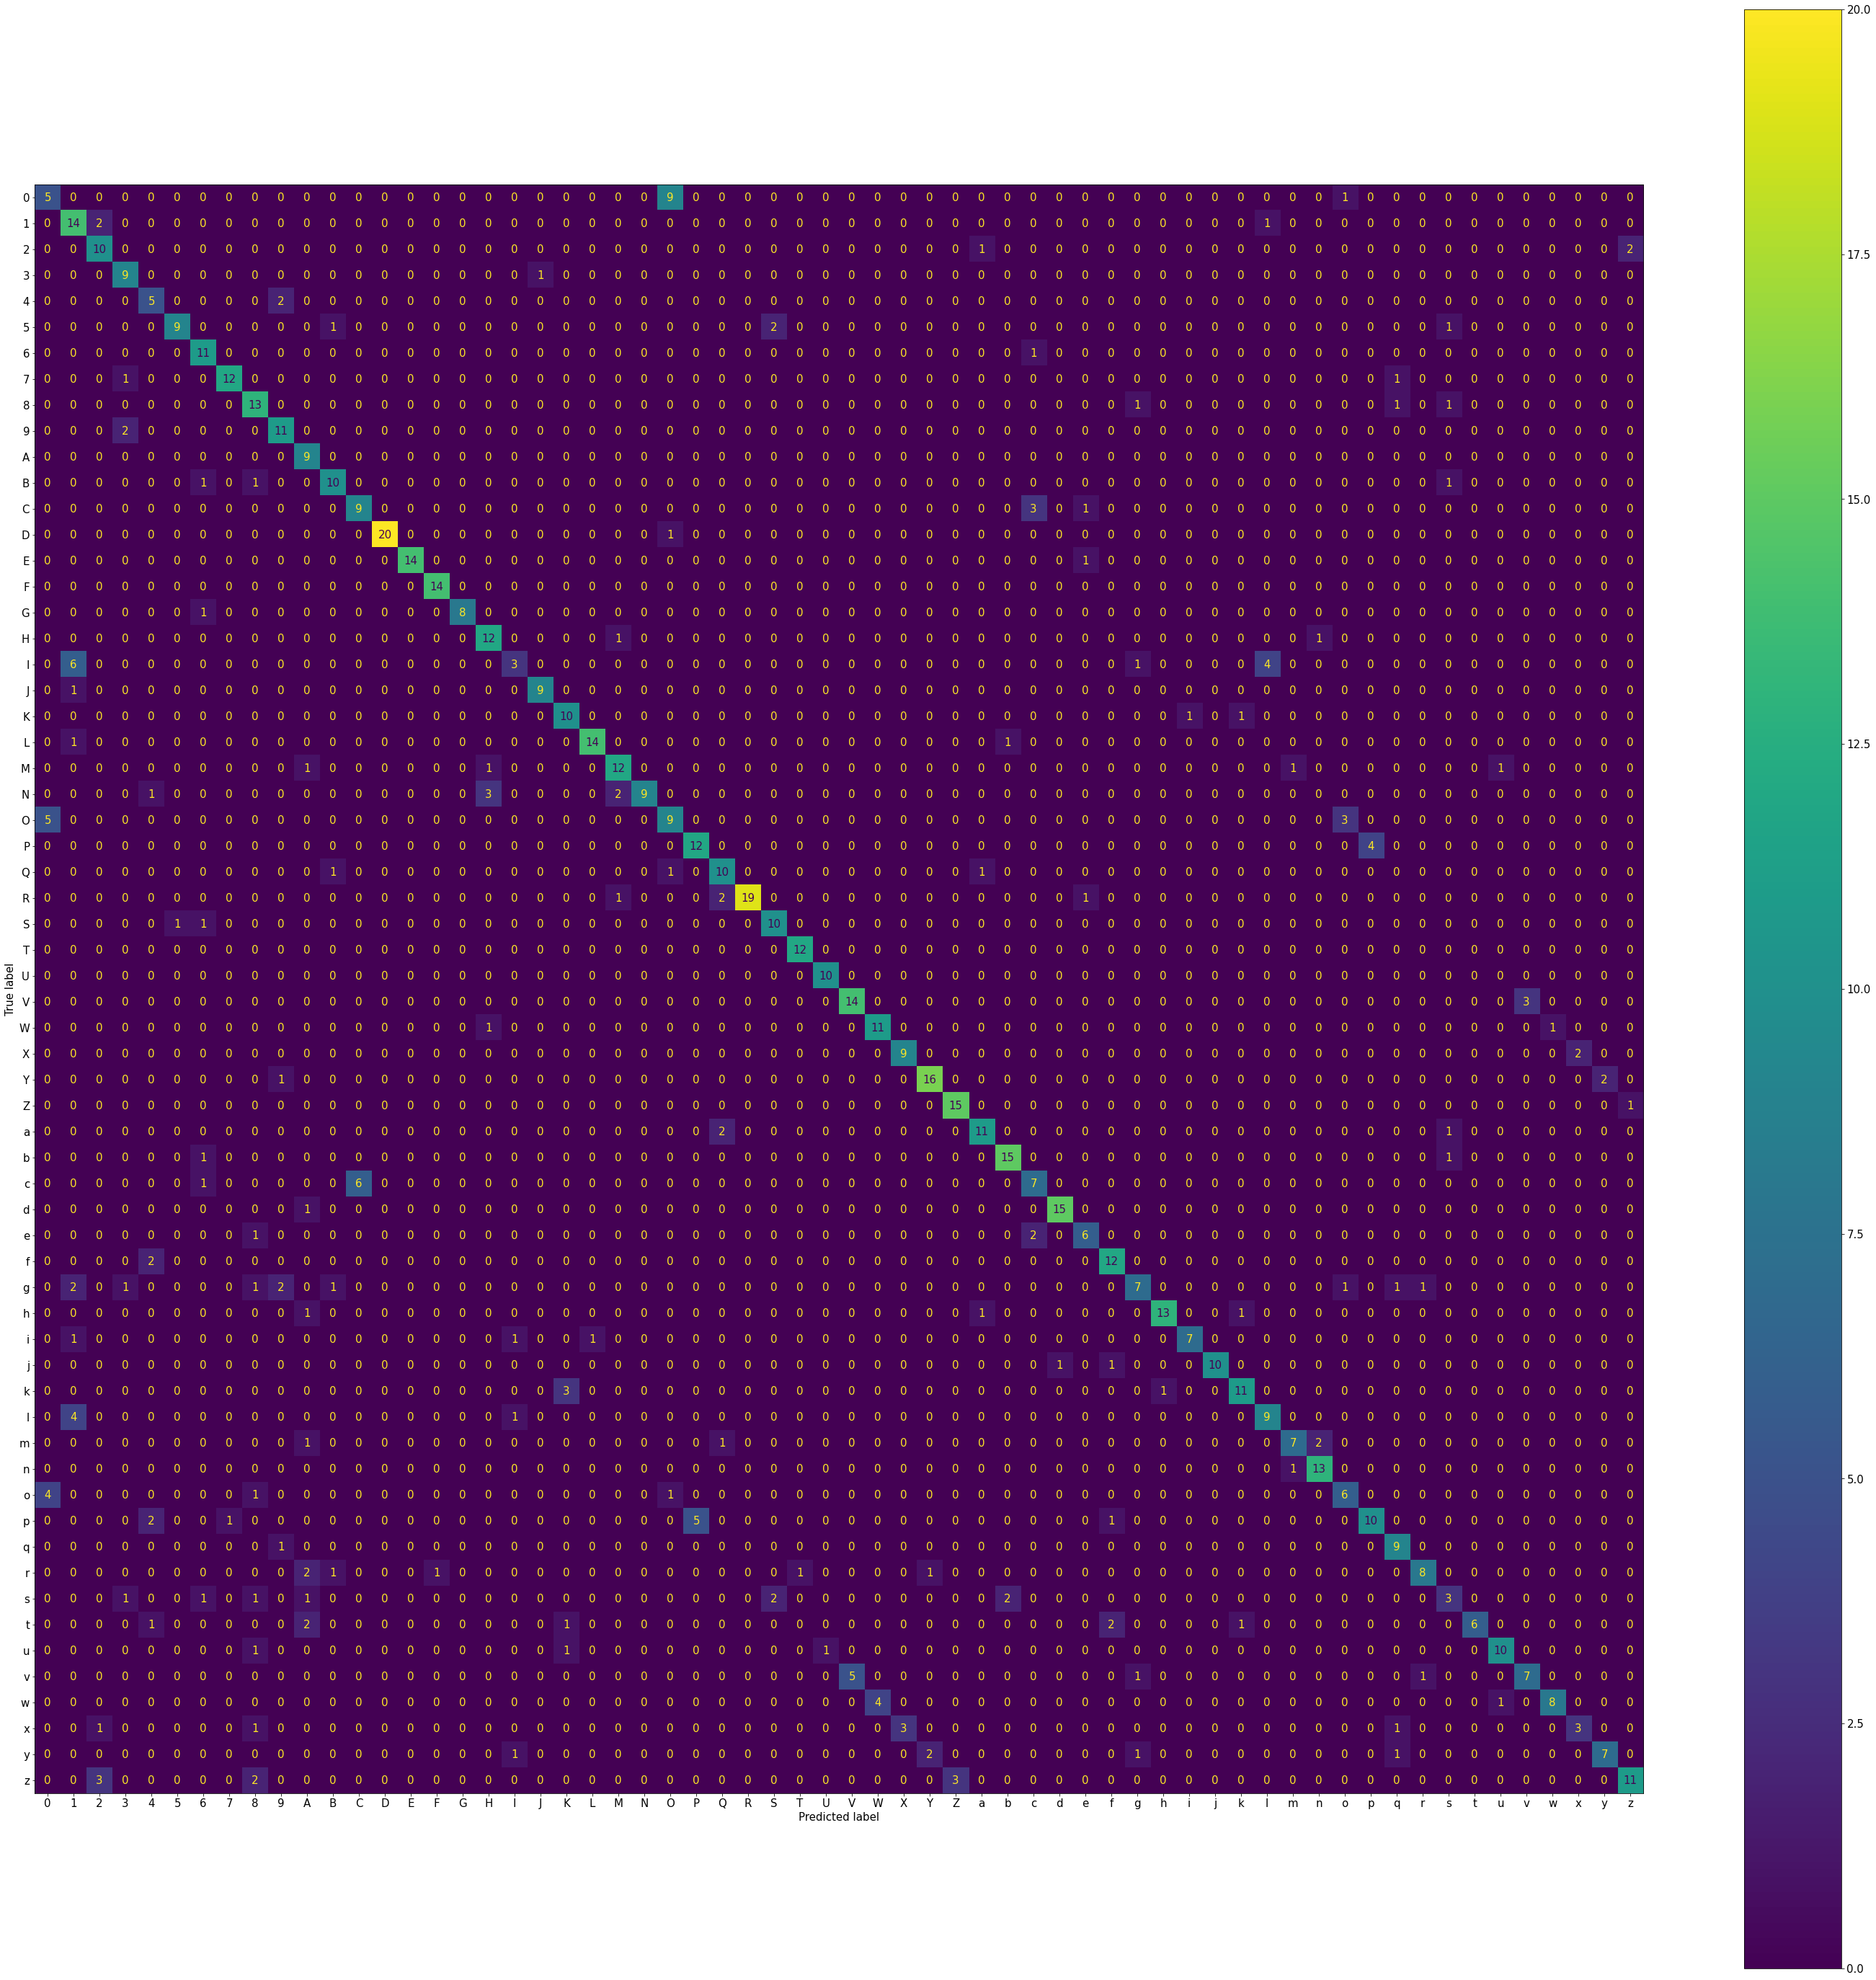

In [ ]:
if fit:
    models = [('rf', RandomForestClassifier(n_estimators=150)), ('knn', KNeighborsClassifier(n_neighbors=5)) , ('svm', svm.NuSVC())]
    ensemble = VotingClassifier(estimators=models, voting='hard')
    ensemble = ensemble.fit(x_train, y_train)
    joblib.dump(ensemble, './models/ensemble_model')
else:
    ensemble = joblib.load('./models/ensemble_model')
t6 = time.time()
res6 = ensemble.predict(x_test) 
print("Ensemble's Accuracy: ", metrics.accuracy_score(y_test.reshape(-1,1), res6))
print("Time Elapsed by Ensemble: ", time.time() - t6)

values = metrics.precision_recall_fscore_support(y_test, res6, average = 'macro')
print('SciKit Ensemble Precision: ', values[0])
print('SciKit Ensemble Recall: ', values[1])
print('SciKit Ensemble F-value: ', values[2])

metrics.ConfusionMatrixDisplay.from_predictions(y_test, res6)

plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams.update({'font.size': 15})

%cd ConfusionMatrices
plt.savefig("Ensemble.png")
%cd ..

plt.show()

##Final Verdict

A table that lists the accuracies of the different models trained and tested can be found below:

| Model              | Accuracy |
|--------------------|----------|
| KNN (Team)         | 0.669    |
| KNN (Scikit-Learn) | 0.665    |
| SVM                | 0.725    |
| Decision Tree      | 0.584    |
| **Random Forest**      | **0.778**    |
| Ensemble           | 0.739    |

As can be seen above, the **Random Forest** machine learning algorithm produced the best results, with an **accuracy of 77.8%**. As such, this model will be used to develop the note-taking mobile application.

For further reference, the code can be found on:
https://github.com/t0t0-01/Handwritten-Digit-Letter-Recognition-App